In [1]:
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import time


from gym.envs.registration import register

theId = 'FrozenLake-v1'

#try: 
    register(
        id= theId,
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={'map_name' : '4x4', 'is_slippery': False},
        max_episode_steps=100,
        reward_threshold=0.78, # optimum = .8196
    )
except: 
    print('already registered')

In [2]:

theId = 'FrozenLake-v1'
env = gym.make(theId, desc=None, map_name="4x4", is_slippery=True, render_mode="rgb_array") #render_mode 'human'


env.reset()


for step in range(15):
    env.render()
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    env.step
    time.sleep(0.3)
    
    if terminated or truncated:
        env.reset()
    
env.close()

In [3]:
# row = state/observation 
# column = action

action_size = env.action_space.n
state_size = env.observation_space.n

q_table = np.zeros([state_size, action_size])



In [4]:
q_table
q_table.shape

(16, 4)

In [5]:
EPOCHS = 20000 #episodes - how many times the agent plays the game

In [6]:
ALPHA = 0.8 #learning rate

In [7]:
GAMMA = .95 #DISCOUNT RATE gamma^2 r + gamma^3 ...

In [8]:
epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001


In [9]:
def epsilon_greedy_action_selection(epsilon, q_table,discrete_state):
    
    random_number = np.random.random()
    
    #exploitation - choose thea action that maximizes q
    if random_number > epsilon:
        state_row = q_table[discrete_state,:] # return a row from q
        action = np.argmax(state_row) #actions are 0,1,2,3
    # exploration - choose a random action 
    else:
        action = env.action_space.sample()
        
    return action

In [10]:
def compute_next_q_value(old_q_value, reward, next_optimal_q_value):
    return old_q_value +  ALPHA * (reward + GAMMA * next_optimal_q_value - old_q_value)


In [11]:
def reduce_epsilon(epsilon,epoch):
    return min_epsilon + (max_epsilon-min_epsilon)*np.exp(-decay_rate*epoch)

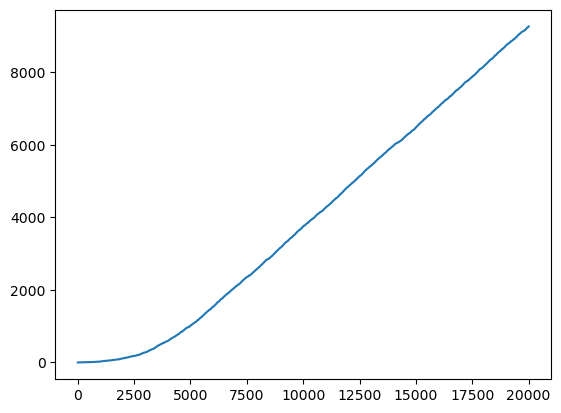

In [12]:
# List of rewards
rewards = []
log_interval = 1000

## table visualization

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.canvas.draw()
epoch_plot_tracker = []
total_reward_plot_tracker = []

## table visualiztion

# Play 20k games
for episode in range(EPOCHS):
    # Reset the environment
    state = env.reset()[0]
    terminated = False
    total_rewards = 0
    #print('state')
    #print(state)
    
    while not terminated:
        action = epsilon_greedy_action_selection(epsilon,q_table, state)

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, terminated, truncated, info = env.step(action)
    
        #print('q')
        #print(q_table)
        #print('now state')
        #print(state)
        #print('action')
        #print(action)
        # Look up current/old qtable value Q(s_t,a_t)
        old_q_value =  q_table[state,action]  

        # Get the next optimal Q-Value
        next_optimal_q_value = np.max(q_table[new_state, :])  

        # Compute next q value
        next_q = compute_next_q_value(old_q_value, reward, next_optimal_q_value)   

        # Update Q Table
        q_table[state,action] = next_q

        
        
        total_rewards = total_rewards + reward
        
        # Our new state is state
        state = new_state

        
    episode += 1
    # Reduce epsilon (because we need less and less exploration)
    epsilon = reduce_epsilon(epsilon,episode) 
    rewards.append(total_rewards)
    
    total_reward_plot_tracker.append(np.sum(rewards))
    epoch_plot_tracker.append(episode)
    
    if episode % log_interval == 0:
        ax.clear()
        ax.plot(epoch_plot_tracker,total_reward_plot_tracker)
        fig.canvas.draw()
        print(np.sum(rewards))

env.close()

In [13]:
q_table

array([[2.62275633e-01, 6.55545212e-02, 6.20217125e-02, 5.96273707e-02],
       [1.82454826e-03, 1.76897501e-02, 2.94501850e-02, 9.23410270e-02],
       [6.03298534e-03, 8.64185665e-03, 1.73083520e-03, 2.70948643e-02],
       [1.55287818e-03, 6.28804659e-03, 9.71072753e-05, 1.87363470e-02],
       [5.05805945e-01, 6.33902752e-02, 6.62943088e-02, 4.01560311e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.26127149e-01, 6.44730351e-06, 2.32741703e-03, 4.80613395e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.82579353e-02, 1.82757083e-02, 7.03678160e-03, 6.30525478e-01],
       [2.90090226e-02, 7.46625297e-01, 4.51853426e-02, 1.71491995e-02],
       [8.80971769e-01, 1.04567206e-03, 9.25076572e-04, 1.91604775e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.99161464e-02, 3.60205501e-02, 8.01969280e